In [1]:
import numpy as np

with open('Points.txt') as f:
    w, h = [float(x) for x in next(f).split()] # read first line
    array = []
    for line in f: # read rest of lines
        array.append([float(x) for x in line.split()])

random_points = np.array(array)
print(random_points.shape)

(899, 2)


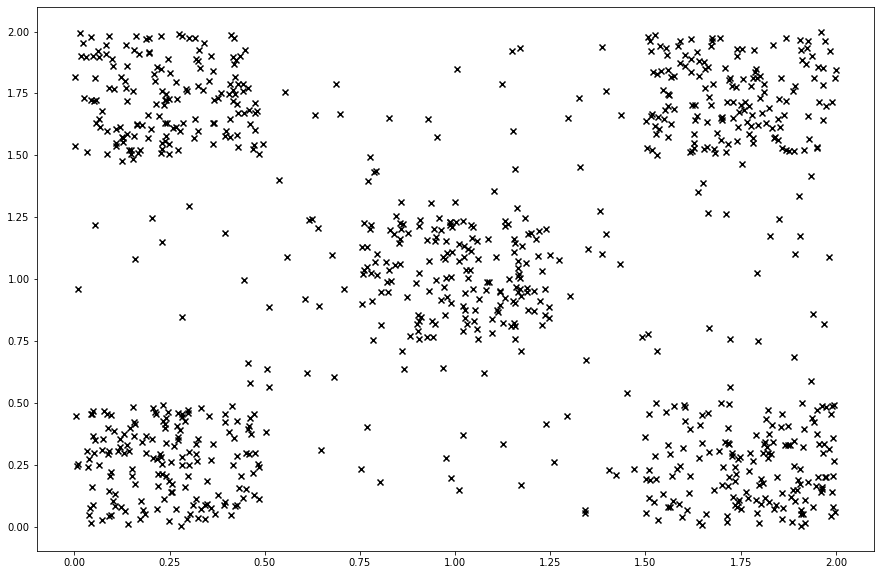

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))

for vector in array:
    plt.scatter(vector[0],vector[1], marker="x", color="black")
plt.show()

In [3]:
import random

def k_means(random_points,K,num_of_it):

    centroids = []
    error = []

    for i in range(0,K):                                   # Initializing our Random Centroids  
        rand_idx = random.randrange(len(random_points))
        random_num = random_points[rand_idx]
        centroids.append(random_num)
    
    for i in range(0,num_of_it):

        clussters = {}                                     # Initialzing the Clussters dictionary
        Sum_of_Squared_Error = 0                           # Initialing, to zero, our Error metric

        for vector in random_points:                       # Predicting the Cluster for each vector
            
            eucl_dist = []
            for centroid in centroids:                     # Calculating the Euclidian Distance of the Vector from each Centroid
                dist = np.linalg.norm(vector - centroid)
                eucl_dist.append(dist)
            
            min_value = min(eucl_dist) 
            Sum_of_Squared_Error+=(min_value*min_value)    # Calculating the Error
            min_index = eucl_dist.index(min_value)
            
            if min_index in clussters :                    # Assigning the Vector to a Cluster based on the Euclidian Distance
                temp_list = clussters[min_index]
                temp_vector = vector.tolist()
                temp_list.append(temp_vector)
                clussters[min_index] = temp_list
            else:
                flag_list = []
                temp_vector = vector.tolist()
                flag_list.append(temp_vector)
                clussters[min_index] = flag_list
        
        error.append(Sum_of_Squared_Error)                  # Storing the Error metric of each itteration
        
        centroids = []                                      # Initialzing the Centroids list

        for key,value in clussters.items():                 # Calculating the New Centroids
            sum_x = 0
            sum_y = 0
            flag=0
            for vector in clussters[key]:
                flag+=1
                sum_x+=vector[0]
                sum_y+=vector[1]
            new_x = sum_x/flag
            new_y = sum_y/flag
            centroids.append([new_x,new_y])

    fig = plt.figure(figsize=(28,12))
    fig.subplots_adjust(hspace=0.40, wspace=0.25)

    ax = fig.add_subplot(1, 2, 1)
    plt.title("K-Means Clusstering")

    colors = ["blue","orange","green","red","purple","brown","pink","gray","olive","cyan"]
    i=-1
    for key,value in clussters.items():
        i+=1
        for vector in clussters[key]:
            plt.scatter(vector[0],vector[1], marker="x", color=colors[i])
    for centers in centroids:
        plt.scatter(centers[0],centers[1], marker="o", color="black")

    ax = fig.add_subplot(1, 2, 2)  
    plt.title("Sum of Squared Errors") 
    plt.plot(error)
    plt.ylabel("Error")
    plt.xlabel("Number of Itterations")

    plt.show()

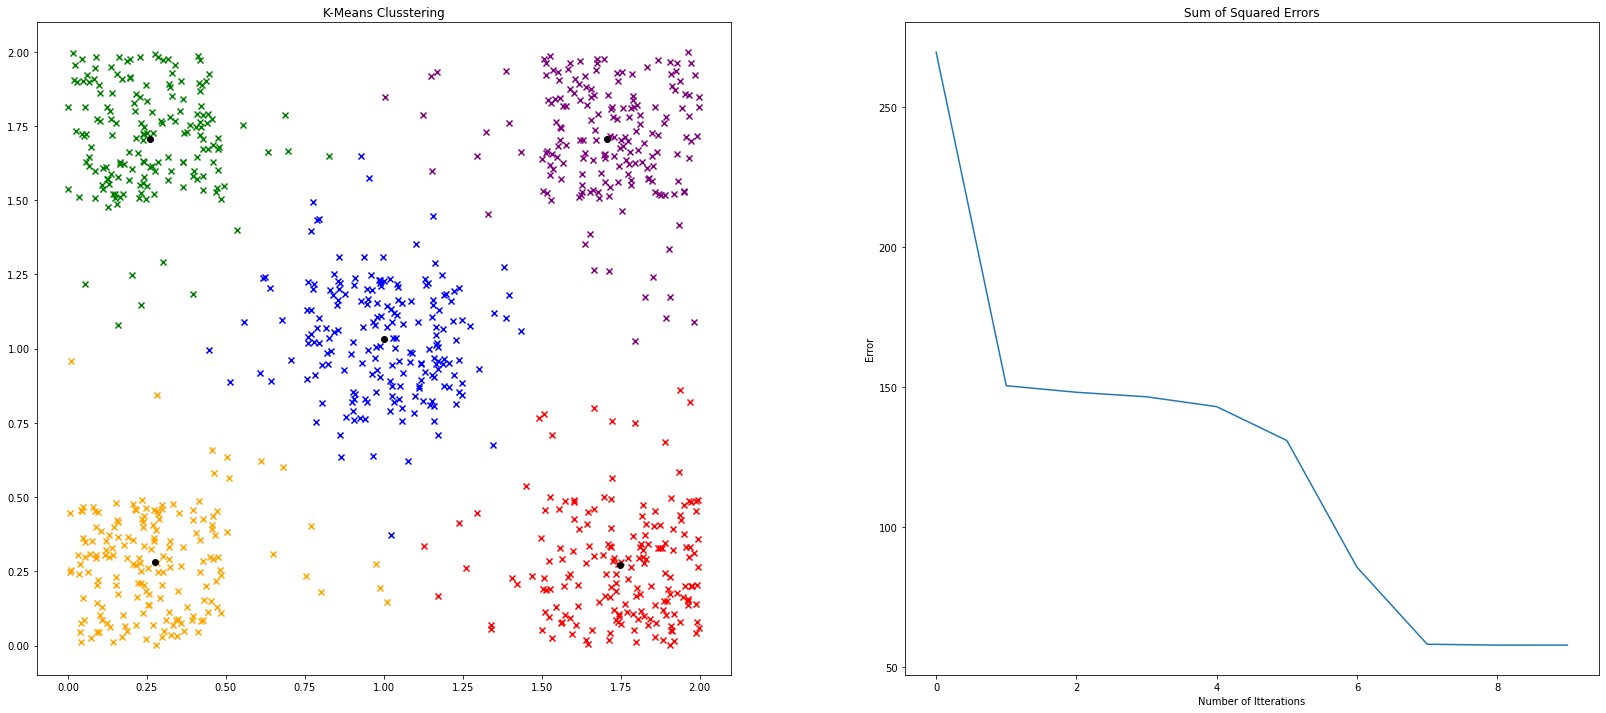

In [4]:
k_means(random_points,5,10)